In [17]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve, auc


In [19]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")

In [20]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [23]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [24]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [50]:
data.drop(columns=['Unnamed: 32'], inplace=True)

In [52]:
#Feature and Label selection
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [53]:
print(data["diagnosis"].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [54]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
y = lb.fit_transform(y)

In [55]:
# Splitting the dataset into the Training set and Test set (30 - 70)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [56]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [61]:
'''
classifier = Sequential()
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #classify
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()
'''


"\nclassifier = Sequential()\nclassifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))\nclassifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))\nclassifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #classify\nclassifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\nclassifier.summary()\n"

In [66]:

model=Sequential([

    Dense(32,activation='relu',input_dim=30),

    Dense(16,activation="relu"),


    Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                992       
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
#performing 12 epochs
history = model.fit(x_train, y_train, epochs=12, validation_split=0.2)

#classifier.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.2)

Epoch 1/12
10/10 [==============================] - 1s 25ms/step - loss: 0.6500 - accuracy: 0.6761 - val_loss: 0.5984 - val_accuracy: 0.8250
Epoch 2/12
10/10 [==============================] - 0s 7ms/step - loss: 0.5572 - accuracy: 0.8648 - val_loss: 0.5222 - val_accuracy: 0.9375
Epoch 3/12
10/10 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.9308 - val_loss: 0.4513 - val_accuracy: 0.9750
Epoch 4/12
10/10 [==============================] - 0s 6ms/step - loss: 0.4158 - accuracy: 0.9434 - val_loss: 0.3839 - val_accuracy: 0.9750
Epoch 5/12
10/10 [==============================] - 0s 6ms/step - loss: 0.3492 - accuracy: 0.9497 - val_loss: 0.3206 - val_accuracy: 0.9625
Epoch 6/12
10/10 [==============================] - 0s 6ms/step - loss: 0.2885 - accuracy: 0.9497 - val_loss: 0.2649 - val_accuracy: 0.9750
Epoch 7/12
10/10 [==============================] - 0s 6ms/step - loss: 0.2403 - accuracy: 0.9497 - val_loss: 0.2177 - val_accuracy: 0.9750
Epoch 8/12
10/10 [=

In [65]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 35ms/step - loss: 0.9874 - accuracy: 0.3302 - val_loss: 0.8117 - val_accuracy: 0.4250
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.7541 - accuracy: 0.3868 - val_loss: 0.6543 - val_accuracy: 0.5125
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6020 - accuracy: 0.5440 - val_loss: 0.5473 - val_accuracy: 0.6875
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.4927 - accuracy: 0.8428 - val_loss: 0.4610 - val_accuracy: 0.8625
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.4018 - accuracy: 0.9497 - val_loss: 0.3868 - val_accuracy: 0.8875
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.3242 - accuracy: 0.9654 - val_loss: 0.3227 - val_accuracy: 0.9125
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.2598 - accuracy: 0.9748 - val_loss: 0.2707 - val_accuracy: 0.9500
Epoch 8/50
10/10

In [67]:
history = model.fit(x_train, y_train, epochs=75, validation_split=0.2)

Epoch 1/75
10/10 [==============================] - 2s 38ms/step - loss: 0.8046 - accuracy: 0.3931 - val_loss: 0.6879 - val_accuracy: 0.5625
Epoch 2/75
10/10 [==============================] - 0s 8ms/step - loss: 0.6042 - accuracy: 0.6918 - val_loss: 0.5566 - val_accuracy: 0.7375
Epoch 3/75
10/10 [==============================] - 0s 6ms/step - loss: 0.4761 - accuracy: 0.8428 - val_loss: 0.4615 - val_accuracy: 0.8625
Epoch 4/75
10/10 [==============================] - 0s 8ms/step - loss: 0.3857 - accuracy: 0.8899 - val_loss: 0.3851 - val_accuracy: 0.8875
Epoch 5/75
10/10 [==============================] - 0s 7ms/step - loss: 0.3191 - accuracy: 0.9245 - val_loss: 0.3246 - val_accuracy: 0.9375
Epoch 6/75
10/10 [==============================] - 0s 7ms/step - loss: 0.2688 - accuracy: 0.9308 - val_loss: 0.2762 - val_accuracy: 0.9625
Epoch 7/75
10/10 [==============================] - 0s 7ms/step - loss: 0.2297 - accuracy: 0.9403 - val_loss: 0.2381 - val_accuracy: 0.9625
Epoch 8/75
10/10 [=

<Figure size 2000x800 with 0 Axes>

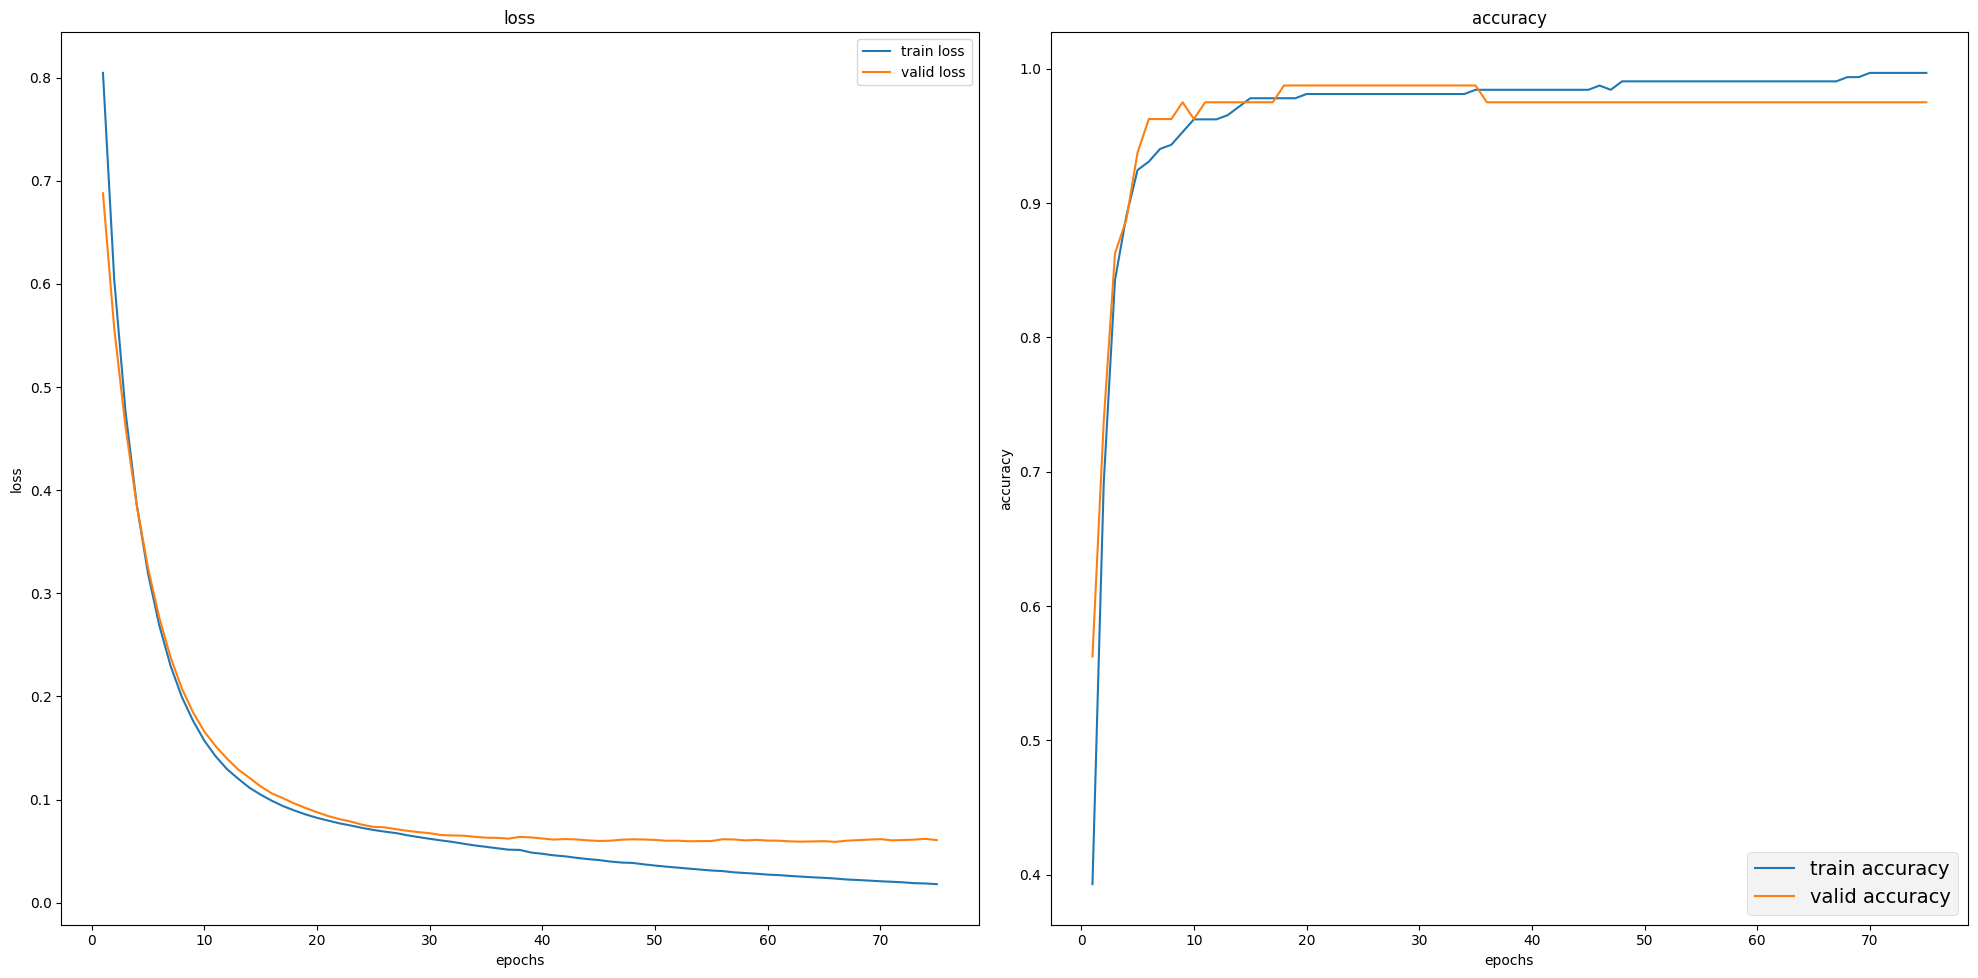

In [68]:
plt.figure(figsize=(20, 8))
tr_loss=history.history["loss"]
val_loss=history.history["val_loss"]

tr_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

epochs=[i+1 for i in range (len(tr_accuracy))]


plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.plot(epochs,tr_loss,label="train loss")
plt.plot(epochs,val_loss,label="valid loss")
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs,tr_accuracy,label="train accuracy")
plt.plot(epochs,val_accuracy,label="valid accuracy")
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.legend();

In [69]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 3ms/step


In [71]:
c=confusion_matrix(y_test,y_pred)
c

array([[107,   1],
       [  1,  62]])

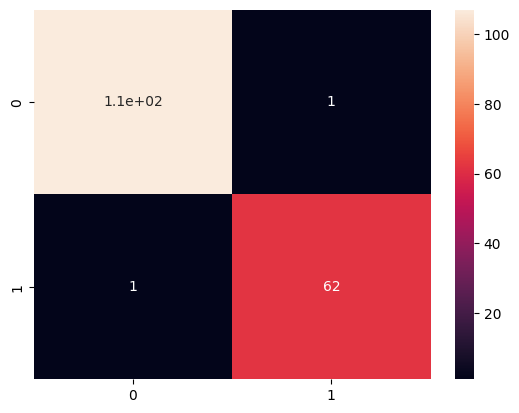

In [72]:
plt.style.use('default')
sns.heatmap(c,annot=True);

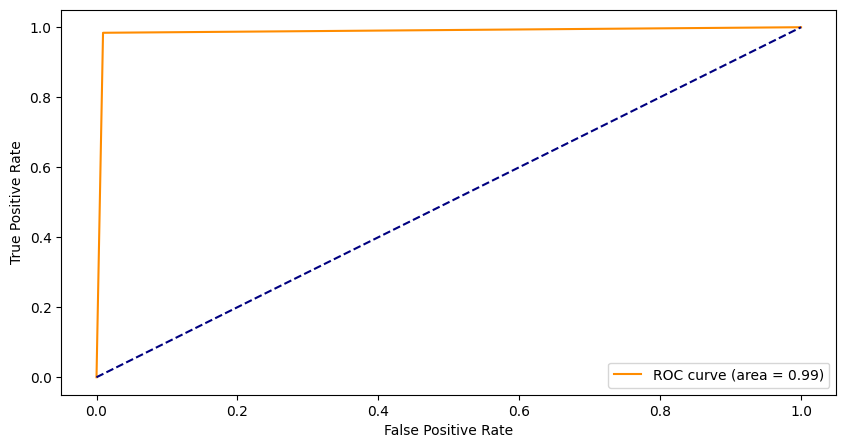

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [75]:
auc_score = roc_auc_score(y_test, y_pred)

print("AUC Score:", auc_score)

AUC Score: 0.9874338624338624
